# A Quick-and-Dirty Attempt to Maximize "Percentile Kurtosis"

## Motivation

Suppose someone tells you the event $X=x$ is a "$+4\sigma$ event" i.e. that
its $z$-score $z(X=x) = +4$. That sounds statistically extreme!
$X=x$ seems like a very rare event. In other words, its percentile
$\Pr[X \leq x]$ is probably very high.
Indeed, if $X$ is Normal, $X=x$ would be essentially impossible.


I want to try to construct a "pathological" example: A distribution
with finite mean $\mu$ and standard deviation $\sigma$
where an event as extreme as $X = x := \mu + 4\sigma$ (i.e. a $+4\sigma$ event)
is actually _very_ likely. This is hard, but I'll settle for
making it _pretty_ likely.


In other words, I want to construct a distribution that is highly "percentile-kurtotic":
A distribution where $1 - \Pr[X \leq \mu + 4\sigma]$ is maximal.


## Definitions

### $z$-score

We define $z$-score
$$z(X=x) := \frac{x - \mu}{\sigma(X)},$$
with
$$\sigma^2(X) := \int_{x=-\infty}^{x=\infty} (x - \mu)^2 \Pr[X=x] dx,$$
where $X$ is a random variable and we abuse notation a bit to let $\Pr[X=x]$
represent its probability density function.
(We're going to continue to be a bit hand-wavey with this,
assuming some mild conditions e.g. PDF is continuous.)


### percentile

We define percentile (AKA cumulative distribution function) the usual way, as
$$Pr[X \leq x] := \int_{t=-\infty}^{t=x} \Pr[X=t] dt.$$


### "percentile kurtosis"

Finally, as I alluded above, I'm going to define the "percentile kurtosis"
(a made-up term) $k$ of a random variable as
$$k(X) := 1 - \Pr[X \leq \mu + 4\sigma],$$
the complement-percentile of a $+4\sigma$ event.
Maximizing $k$ is equivalent to minimizing the percentile.


## Background

Using the definitions above, let's answer a couple quick questions.


### Can $k$ be literally 0, i.e. $\Pr[X \leq \mu + 4\sigma] = 1$?

Yes. Consider the Standard Uniform from 0 to 1.
$$\mu + 4\sigma = 0.5 + 4\sqrt{1/12} \approx 1.65 > 1,$$
so that a $4\sigma$ event is not just "essentially" impossible,
but "literally" impossible: It's literally outside the support
of the distribution.

This is not a very helpful example for our question, because
we want to _maximize_ $k$. But it's just background.


### Can $k$ be essentially but not literally 0?

Yes, we already mentioned the example of the Standard Normal.


### Can $k$ be some small but nontrivial positive value?

Yes, the Standard $\chi^2$ distribution has $\mu = 1$ and $\sigma = \sqrt{2}$.
In this case, $k = 1 - \Pr[X \leq \mu + 4\sigma]$ turns out to be about $0.01$.


### Can $k$ be literally 1, i.e. $\Pr[X \leq \mu + 4\sigma] = 0$?

No. This sounds silly but it's still worth convincing ourselves that
it's truly impossible.


Assume for simplicity that $\mu = 0$ (this is WLOG, because if $\mu \neq 0$,
we can just shift the entire distribution by $-\mu$).


Suppose to the contrary that it is possible, i.e. there is some
random variable $X$ s.t. $\Pr[X \leq +4\sigma] = 0$.
Then,
$$\Pr[X = x] = 0 \qquad\;\forall\; x \in (-\infty,\, +4\sigma].$$
Hence, we can collapse the expression for variance to
$$\sigma^2(X) = \int_{x=+4\sigma}^{x=+\infty} x^2 \Pr[X=x] dx.$$
So we can think of the variance as a weighted average of
squared values between $+4\sigma$ and $+\infty$.


Standard deviation is of course nonnegative, so also
$+4\sigma \geq 0$. So the smallest squared value
in the weighted average is $(+4\sigma)^2 = 16\sigma^2$.
Necessarily, then, the final weighted average must be
at least $16\sigma^2$. (Actually, it must be just a smidge more than $16\sigma^2$,
because we put zero density at exactly $X = +4\sigma$,
hence the smallest-possible squared value is $(+4\sigma + \varepsilon)^2$,
and if we accounted for this smidge, we'd run into a contradiction
immediately. However, I find it more illuminating at this step to draw
the weaker conclusion, which is still true,
but lets us run further before hitting a contradiction.)


Hence we get
$$\sigma^2 \geq 16\sigma^2 \implies \sigma = 0.$$


So supposing that $k$ can be $1$ for some distribution,
that distribution must have zero variance.


Well, according to a convention, the Dirac delta is the
unique probability density function with zero variance
(take this for granted, or if you insist on arguing, email me).
It characterizes the density of a point mass.


So let's try it out. Supposing $X$ is a Dirac-delta-distributed
random variable (AKA a constant), we have
$$\Pr[X \leq +4\sigma] = \Pr[X \leq 0] = 1.$$


Sadly, this failed. We had assumed the exact opposite:
that $\Pr[X \leq 0] = 0$.
Hence by contradition, we have Q.E.D.


### What about the evil Cauchy (AKA Standard $t$) distribution?

Obviously, one of the immediate problems with the Cauchy
(that indeed disqualifies it from consideration)
is that its variance (or even its mean) is not finite.


But it can be instructive to think about it.
If we "define" $\sigma(X) := \infty$ (acceptable)
and $\mu(X) := 0$ (please don't haunt my dreams Prof Blitzstein)
for a Cauchy random variable,
then $\mu(X) + 4\sigma(X) = +\infty$, which is the upper bound of support
for the Cauchy, hence $k(X) = 0$, just like for the Standard Uniform.


The problem here is that the fat tails of the Cauchy
are _so_ fat, that they make its standard deviation infinite.
At that point, it becomes impossible to push any probability mass
at all beyond $\mu+4\sigma$, because there's no more number line
remaining after that.


## The quick-and-dirty exploration

Obviously, the best would be to solve for the maximal $k$ analytically in closed form. Letting WLOG $\mu = 0$, we want to solve
$$\max_{f \in F} \int_{x=\ell}^{x=+\infty} f(x)dx,$$
where $F$ is the set of well-formed PDF's and
$$\ell := 4\sqrt{\int_{t=-\infty}^{t=+\infty} t^2 f(t)dt}.$$
This doesn't look impossible but it certainly looks very boring and I haven't got any good ideas about how to begin.


The worst would be Monte Carlo, which I've genuinely gotten as a suggestion here. Monte Carlo is good for pinning down "averages" but necessarily always as good for pinning down "extremes".


I will compromise by selecting some high "resolution" $N$ and simply systematically generating and analyzing all the possible discrete PMF's available at this resolution. This program is in essence combinatorial (factorial) so $N$ will be limited by how long I'm willing to let my notebook run.

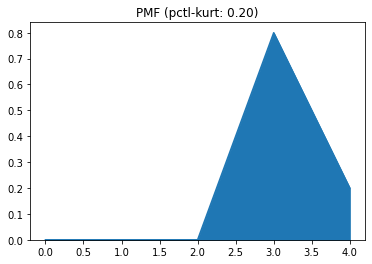

In [55]:
from typing import Tuple, Generator
import pandas as pd
import matplotlib.pyplot as plt

PMF: type = pd.Series  # int index, float data

N: int = 5


def gen_perms(len_: int=N, sum_: int=N) -> Generator[Tuple[int], None, None]:
    """
    Generate permutations of Naturals $\{0, 1, 2, ...\}$ with length `len_` and sum `sum_`.
    Each permutation is a tuple of the form `(n_0, n_1, n_2, ..., n_{len_-1})`.
    
    This is pretty general code, but we're going to keep it simple by fixing some large `N`,
    and then analyzing `gen_perms(len_=N, sum_=N)`. In this usage, `N` represents our
    "resolution": Ultimately, we'll normalize (elementwise) each permutation by `N` itself and
    thereby yield a well-formed PMF. It's convenient to let `sum_ := len_` because
    then we can perfectly encode a Uniform PMF as an $N$-tuple of 1's.
    
    You might notice that as `N` increases, so does the support of our PMF:
    That's OK. The key is that larger `N` gives us more flexibility to create
    finer and finer "shapes" for the PMF. It doesn't matter that in the process
    of creating these shapes, we stretch out the support, because you can always
    just imagine analyzing instead the PMF of the random variable $X/N$ i.e. our
    random variable $X$ divided by our fixed resolution $N$, thereby shrinking the support
    back down to the interval $[0, 1]$. Results will be equivalent for our purposes.
    
    Dynamic programming generator:
    The former saves time and the latter saves space.
    Recursive solution, inspired by https://stackoverflow.com/a/7748851.
    """
    if len_ < 1:
        raise ValueError(len_)
    if sum_ < 0:
        raise ValueError(sum_)
    
    # base case
    if len_ == 1:
        # only choice is singleton tuple with `sum_` as its only element
        yield (sum_,)
    # recursive case
    else:
        # iterate over choices for head (first) element i.e. $n_0$
        for head in range(sum_ + 1):
            """
            Now having fixed the head, recursively generate choices for
            the tail (remaining) elements i.e. $n_1, ..., n_{len_-1}$.
            Tail must be `len_ - 1` elements long, and sum to `sum_ - head`.
            """
            for tail in gen_perms(len_=len_-1, sum_=sum_-head):
                # concatenate tuples
                yield (head,) + tail


def get_pmf_from_perm(perm: Tuple[int]) -> PMF:
    """
    Normalize a tuple of ints by its sum, creating a PMF.
    
    input
    -----
    perm: Tuple[int], a permutation of Naturals
        e.g. `(3, 1, 0, 1)`.
    
    output
    -----
    PMF, a well-formed PMF
        e.g. `pd.Series({0: 0.6, 1: 0.2, 2: 0.0, 3: 0.2})`.
    """
    return pd.Series(perm) / sum(perm)


def calc_mean(pmf: PMF) -> float:
    # pmf-weighted average
    return sum(pmf.index * pmf)


def calc_std(pmf: PMF) -> float:
    squared_centered_values = (pmf.index - calc_mean(pmf=pmf))**2
    # again, just a pmf-weighted average
    return sum(squared_centered_values * pmf)


def calc_pctl(pmf: PMF, x: float=0) -> float:
    return pmf.loc[:x].sum()


def calc_pctl_kurt(pmf: PMF) -> float:
    mu = calc_mean(pmf=pmf)
    sigma = calc_std(pmf=pmf)
    pctl = calc_pctl(pmf=pmf, x=mu + 4*sigma)
    return 1 - pctl


def plot_pmf(pmf: PMF) -> None:
    pmf.plot(kind="area", title=f"PMF (pctl-kurt: {calc_pctl_kurt(pmf=pmf):.2f})")
    plt.show()


def main() -> Tuple[float, PMF]:
    max_pctl_kurt = 0  # the maximal pctl-kurt seen so far
    argmax_pctl_kurt = None  # the PMF that gave rise to it

    for perm in gen_perms():
        pmf = get_pmf_from_perm(perm=perm)
        pctl_kurt = calc_pctl_kurt(pmf=pmf)
        assert not pd.isnull(pctl_kurt), \
            (pmf, pctl_kurt)
        if pctl_kurt > max_pctl_kurt:
            max_pctl_kurt = pctl_kurt
            argmax_pctl_kurt = pmf

    plot_pmf(pmf=argmax_pctl_kurt)
    return max_pctl_kurt, argmax_pctl_kurt


if __name__ == "__main__":
    max_pctl_kurt, argmax_pctl_kurt = main()